In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from IPython.core.pylabtools import figsize
#figsize(15,20)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display,HTML

In [3]:
# https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/
# https://towardsdatascience.com/jypyter-notebook-shortcuts-bf0101a98330
# %%time
df_train=pd.read_excel('./dataset/Data_Train.xlsx')
df_test=pd.read_excel('./dataset/Data_Test.xlsx')

In [4]:
df_train_orig = df_train.copy()
df_test_orig = df_test.copy()

In [5]:
df_train.head()
df_test.head()
# display(HTML(df_train.head().to_html()))

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [6]:
def extract_numeric_vals(data):
    real_rating =  data['Reviews'].copy()
    data['Reviews']=pd.to_numeric(data['Ratings'].str.extract(r'^(\d*)', expand=False))
    data['Ratings']= pd.to_numeric(real_rating.str.extract(r'^(\d*)', expand=False)) 
    return data

In [7]:
df_train = extract_numeric_vals(df_train)
df_train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",8,4,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",14,3,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",6,4,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",13,4,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",1,5,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [8]:
df_test = extract_numeric_vals(df_test)
df_test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",960,4,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",1,5,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",4,5,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",11,4,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",9,4,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [9]:
tmp=df_train["Edition"].apply(lambda x : x.split(",")[0])
tmp.value_counts()

Paperback                5193
Hardcover                 823
Mass Market Paperback     155
Sheet music                24
Flexibound                 15
Cards                       8
Spiral-bound                4
Tankobon Softcover          3
Loose Leaf                  2
Plastic Comb                1
Perfect Paperback           1
Leather Bound               1
(Kannada)                   1
Library Binding             1
Product Bundle              1
Board book                  1
(French)                    1
(Spanish)                   1
(German)                    1
Name: Edition, dtype: int64

In [10]:
tmp=df_test["Edition"].apply(lambda x : x.split(",")[0])
tmp.value_counts()

Paperback                1265
Hardcover                 233
Mass Market Paperback      45
Sheet music                 8
Flexibound                  4
Spiral-bound                2
Cards                       1
(Chinese)                   1
Loose Leaf                  1
Name: Edition, dtype: int64

In [11]:
def extract_book_cover_type(data):
    if data == "Paperback" or "Paperback" in data or "Softcover" in data:
        return "Paperback"
    elif data == "Hardcover" or "Leather" in data or "Plastic" in data or "Board" in data:
        return "Hardcover"
    elif data == "Sheet music":
        return "Sheet music"
    elif data == "Flexibound":
        return "Flexibound"
    else:
        return "Paperback"

In [12]:
df_train["CoverType"] =df_train["Edition"].apply(lambda x : extract_book_cover_type(x.split(",")[0]))
df_test["CoverType"]= df_test["Edition"].apply(lambda x : extract_book_cover_type(x.split(",")[0]))

In [13]:
tmp=df_train["Edition"].apply(lambda x :x.split(" ")[-1])
pd.DataFrame(tmp)["Edition"].str.isalpha().value_counts()

False    6216
True       21
Name: Edition, dtype: int64

In [14]:
import re

def extract_date(data):
    match=re.search(r'\d{4}',data)
    if match:
        return pd.to_numeric(match.group())
    else:
        return np.nan

# print(extract_date("Mass Market Paperback,– 1 Oct"))

In [15]:
df_train["Year"]=df_train["Edition"].apply(lambda x :extract_date(x))
df_test["Year"]=df_test["Edition"].apply(lambda x :extract_date(x))

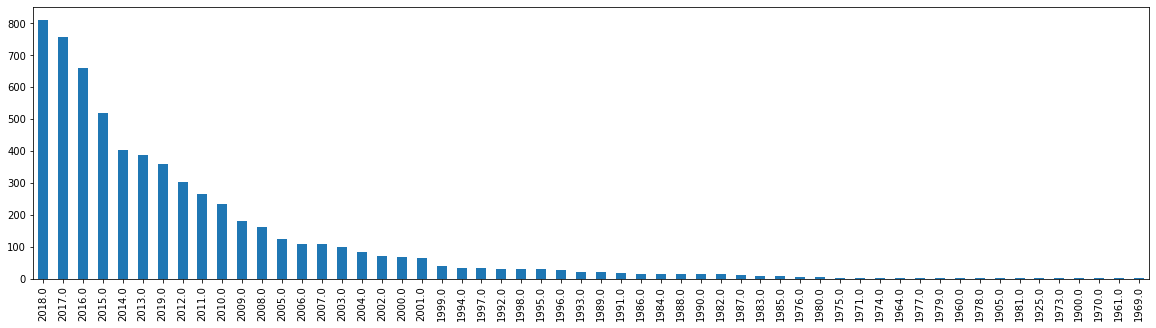

In [16]:
figsize(20,5)
df_train["Year"].value_counts().plot(kind="bar")
# tmp2=tmp2.groupby("Edition").count()
# sns.barplot(x=tmp2["Edition"].unique,y="Edition",data=tmp2)

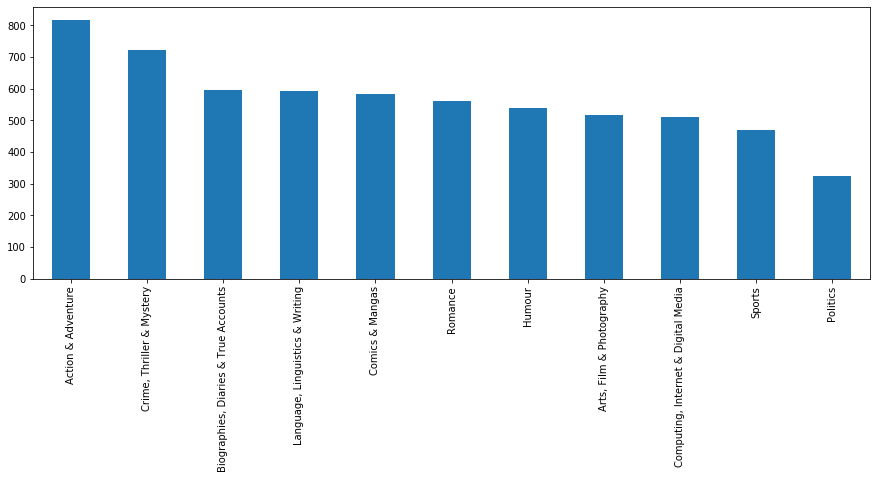

In [17]:
figsize(15,5)
df_train["BookCategory"].value_counts().plot(kind="bar")

In [18]:
df_train["Genre"].value_counts()

Action & Adventure (Books)               947
Romance (Books)                          419
Biographies & Autobiographies (Books)    373
Crime, Thriller & Mystery (Books)        276
Contemporary Fiction (Books)             256
                                        ... 
Structural Engineering                     1
Constitutional Law                         1
Medical Dictionaries                       1
Visual C++ Programming                     1
Essay, Letter & Review Writing             1
Name: Genre, Length: 345, dtype: int64

In [19]:
df_train["SynopsisLength"]= df_train["Synopsis"].apply(lambda x : len(x))
df_test["SynopsisLength"]= df_test["Synopsis"].apply(lambda x : len(x))

In [20]:
df_train["Author"].value_counts()

Agatha Christie                                                      69
Ladybird                                                             49
DK                                                                   48
Albert Uderzo                                                        34
Herge                                                                34
                                                                     ..
Kai-Fu Lee                                                            1
Sharma, R K                                                           1
Rebecca Skloot                                                        1
Edward Capriolo                                                       1
Bill Pierce Ed.D., Scott Murr Ed.D., Ray Moss Ph.D., Amby Burfoot     1
Name: Author, Length: 3679, dtype: int64

In [21]:
df_train["BookCategory"].value_counts()

Action & Adventure                      818
Crime, Thriller & Mystery               723
Biographies, Diaries & True Accounts    596
Language, Linguistics & Writing         594
Comics & Mangas                         583
Romance                                 560
Humour                                  540
Arts, Film & Photography                517
Computing, Internet & Digital Media     510
Sports                                  471
Politics                                325
Name: BookCategory, dtype: int64

In [22]:
df_train.head(10)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,CoverType,Year,SynopsisLength
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",8,4,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,Paperback,2016.0,791
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",14,3,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Paperback,2012.0,1146
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",6,4,"""During the time men live without a common Pow...",International Relations,Humour,299.00,Paperback,1982.0,1662
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",13,4,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback,2017.0,426
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",1,5,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,Hardcover,2006.0,659
5,ChiRunning: A Revolutionary Approach to Effort...,Danny Dreyer,"Paperback,– 5 May 2009",8,4,The revised edition of the bestselling ChiRunn...,Healthy Living & Wellness (Books),Sports,900.00,Paperback,2009.0,1342
6,Death on the Nile (Poirot),Agatha Christie,"Paperback,– 5 Oct 2017",72,4,Agatha Christie’s most exotic murder mystery\n...,"Crime, Thriller & Mystery (Books)","Crime, Thriller & Mystery",224.00,Paperback,2017.0,480
7,Yoga Your Home Practice Companion: A Complete ...,Sivananda Yoga Vedanta Centre,"Hardcover,– Import, 1 Mar 2018",16,4,"Achieve a healthy body, mental alertness, and ...",Sports Training & Coaching (Books),Sports,836.00,Hardcover,2018.0,691
8,Karmayogi: A Biography of E. Sreedharan,M S Ashokan,"Paperback,– 15 Dec 2015",111,4,Karmayogi is the dramatic and inspiring story ...,Biographies & Autobiographies (Books),"Biographies, Diaries & True Accounts",130.00,Paperback,2015.0,864
9,"The Iron King (The Accursed Kings, Book 1)",Maurice Druon,"Paperback,– 26 Mar 2013",1,4,‘This is the original game of thrones’ George ...,Action & Adventure (Books),Action & Adventure,695.00,Paperback,2013.0,926


In [23]:
df_train["TitleLength"]= df_train["Title"].apply(lambda x : len(x))
df_test["TitleLength"]= df_test["Title"].apply(lambda x : len(x))

In [24]:
def show_missing_count(data):
    miss_percent = (data.isnull().sum() / len(data)) * 100
    missing = pd.DataFrame({"Percent":miss_percent, 'Count':data.isnull().sum()}).sort_values(by="Percent", ascending=False)
    missing=missing.loc[missing['Percent'] > 0]
    return missing

In [25]:
show_missing_count(df_train)

,Percent,Count
Year,0.3367,21


In [26]:
show_missing_count(df_test)

,Percent,Count
Year,0.576923,9


In [27]:
tmp=df_train.loc[df_train["Year"].isnull()]
authors_with_missing_year = tmp["Author"].unique().tolist()
tmp2=df_train.loc[df_train["Author"].isin(authors_with_missing_year)]
tmp2=tmp2.loc[tmp2["Year"].notnull()]

In [28]:
tmp2.groupby(["Author"])["Year"].mean()

Author
A.P.J. Abdul Kalam     2013.875000
Agatha Christie        2016.808824
Bhakti Mathur          2015.000000
Devdutt Pattanaik      2014.500000
Frank Miller           2010.833333
Scott Mariani          2016.000000
Sudha Murty            2014.250000
William Shakespeare    2014.400000
Name: Year, dtype: float64

Text(0, 2017.0, '2017.0')

Text(1, 2012.0, '2012.0')

Text(2, 2014.0, '2014.0')

Text(3, 2014.0, '2014.0')

Text(4, 2014.0, '2014.0')

Text(5, 2016.0, '2016.0')

Text(6, 2013.0, '2013.0')

Text(7, 2016.0, '2016.0')

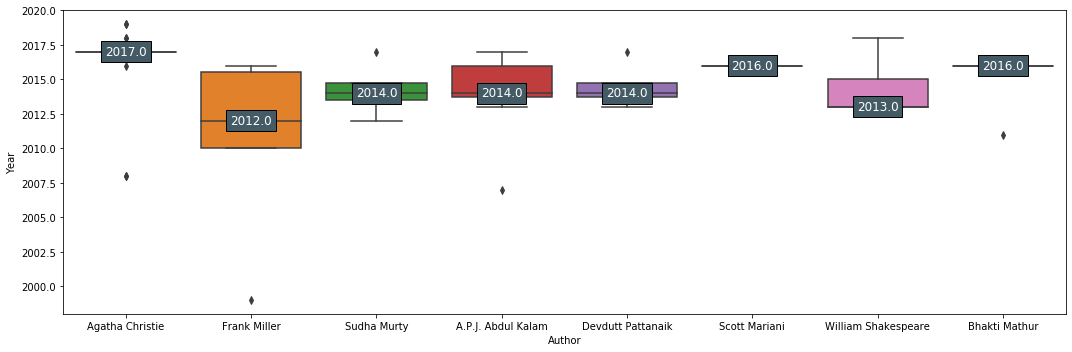

In [29]:
box_plot =sns.boxplot(x='Author',y='Year', data=tmp2)
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median  line
    _y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        _y, 
        f'{_y}', 
        ha='center', 
        va='center', 
        fontweight='normal', 
        size=12,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()



In [30]:
df_train.describe()

,Reviews,Ratings,Price,Year,SynopsisLength,TitleLength
count,6237.000000,6237.000000,6237.000000,6216.000000,6237.000000,6237.000000
mean,29.828122,3.961841,560.707516,2011.875965,1008.851692,44.203463
std,84.139256,0.757993,690.110657,7.921572,590.329952,28.130357
min,1.000000,1.000000,25.000000,1900.000000,18.000000,2.000000
25%,2.000000,4.000000,249.180000,2010.000000,636.000000,23.000000
50%,6.000000,4.000000,373.000000,2014.000000,915.000000,38.000000
75%,21.000000,4.000000,599.000000,2017.000000,1283.000000,59.000000
max,973.000000,5.000000,14100.000000,2019.000000,13095.000000,199.000000


In [31]:
df_test.describe()

,Reviews,Ratings,Year,SynopsisLength,TitleLength
count,1560.000000,1560.000000,1551.000000,1560.000000,1560.000000
mean,26.398718,3.985256,2011.963250,978.842308,44.173718
std,74.446109,0.771801,7.490678,534.248589,28.689686
min,1.000000,1.000000,1942.000000,22.000000,2.000000
25%,2.000000,4.000000,2010.000000,624.000000,22.000000
50%,6.000000,4.000000,2014.000000,899.000000,38.000000
75%,20.000000,4.000000,2017.000000,1226.000000,60.000000
max,960.000000,5.000000,2019.000000,3506.000000,200.000000


In [32]:
df_train["Price"].kurtosis()

80.8434519609723

In [33]:
df_train["Price"].skew()

6.749865573718627

In [34]:
# y=df_train['Price']
# y = np.log1p(y.values)
# y_final = np.expm1(y_final)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


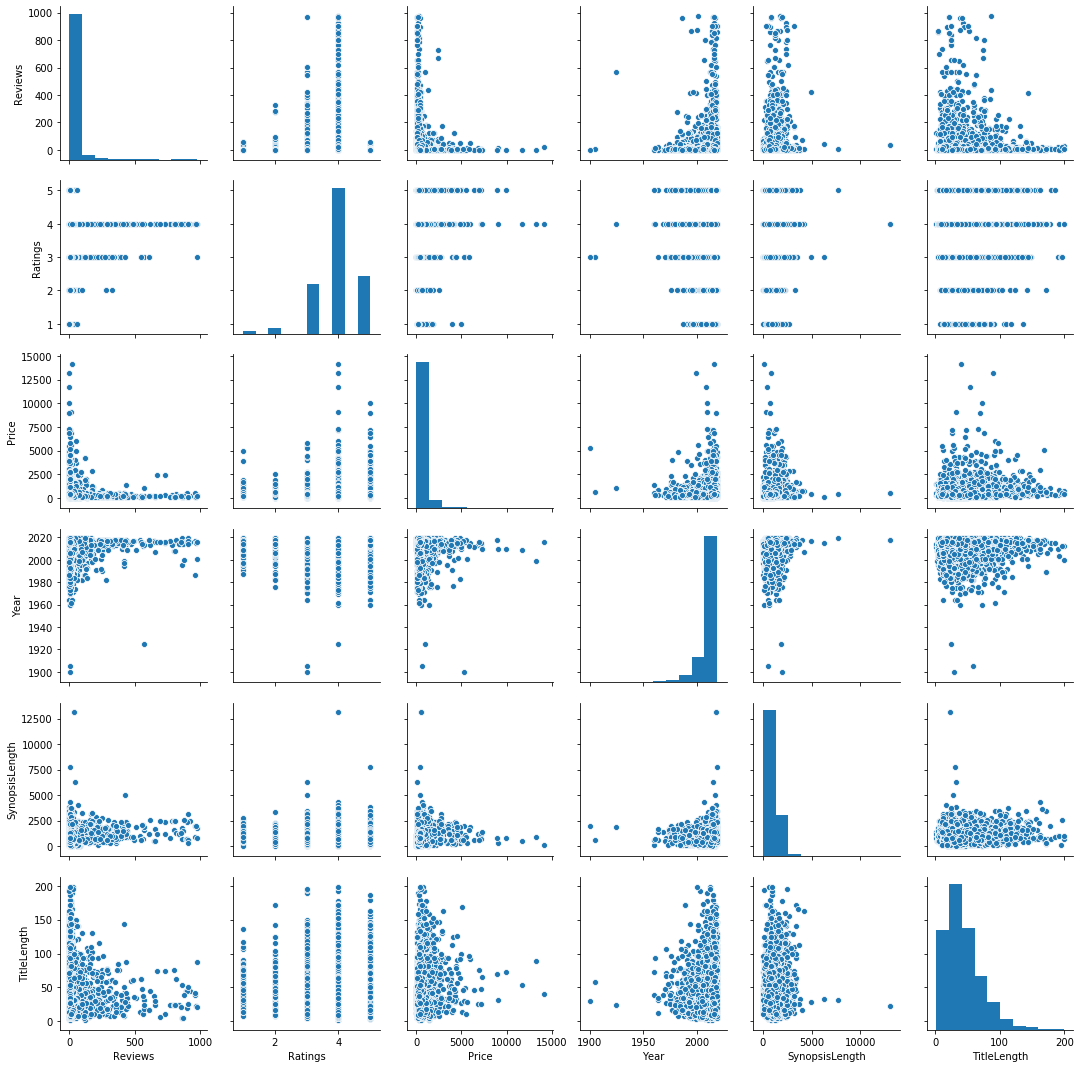

In [35]:
sns.pairplot(df_train)

In [36]:
df_train.corr()

,Reviews,Ratings,Price,Year,SynopsisLength,TitleLength
Reviews,1.000000,-0.057016,-0.101145,0.030610,0.123535,-0.071813
Ratings,-0.057016,1.000000,0.134639,0.006040,-0.015398,0.031966
Price,-0.101145,0.134639,1.000000,-0.024814,0.054038,0.168424
Year,0.030610,0.006040,-0.024814,1.000000,0.109228,0.032574
SynopsisLength,0.123535,-0.015398,0.054038,0.109228,1.000000,0.101959
TitleLength,-0.071813,0.031966,0.168424,0.032574,0.101959,1.000000


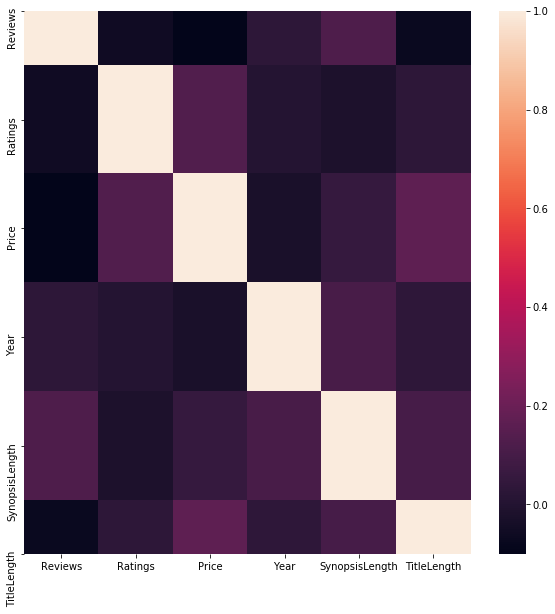

In [37]:
figsize(10,10)
sns.heatmap(df_train.corr())

In [38]:

df_train.fillna(df_train.mean(),inplace=True)

df_test.fillna(df_test.mean(),inplace=True)

In [39]:
show_missing_count(df_test)

,Percent,Count


In [40]:
show_missing_count(df_train)

,Percent,Count


In [41]:
df_train.head()
df_test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,CoverType,Year,SynopsisLength,TitleLength
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",8,4,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,Paperback,2016.0,791,35
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",14,3,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Paperback,2012.0,1146,34
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",6,4,"""During the time men live without a common Pow...",International Relations,Humour,299.00,Paperback,1982.0,1662,28
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",13,4,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback,2017.0,426,34
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",1,5,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,Hardcover,2006.0,659,42


,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,CoverType,Year,SynopsisLength,TitleLength
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",960,4,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery",Paperback,1986.0,1916,42
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",1,5,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media",Paperback,2018.0,2161,141
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",4,5,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance,Paperback,2011.0,990,8
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",11,4,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media",Paperback,2016.0,1189,52
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",9,4,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing",Paperback,2011.0,103,75


In [42]:
df_train.describe()

,Reviews,Ratings,Price,Year,SynopsisLength,TitleLength
count,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000
mean,29.828122,3.961841,560.707516,2011.875965,1008.851692,44.203463
std,84.139256,0.757993,690.110657,7.908223,590.329952,28.130357
min,1.000000,1.000000,25.000000,1900.000000,18.000000,2.000000
25%,2.000000,4.000000,249.180000,2010.000000,636.000000,23.000000
50%,6.000000,4.000000,373.000000,2014.000000,915.000000,38.000000
75%,21.000000,4.000000,599.000000,2017.000000,1283.000000,59.000000
max,973.000000,5.000000,14100.000000,2019.000000,13095.000000,199.000000


In [43]:
df_test.describe()

,Reviews,Ratings,Year,SynopsisLength,TitleLength
count,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000
mean,26.398718,3.985256,2011.963250,978.842308,44.173718
std,74.446109,0.771801,7.469025,534.248589,28.689686
min,1.000000,1.000000,1942.000000,22.000000,2.000000
25%,2.000000,4.000000,2010.000000,624.000000,22.000000
50%,6.000000,4.000000,2014.000000,899.000000,38.000000
75%,20.000000,4.000000,2017.000000,1226.000000,60.000000
max,960.000000,5.000000,2019.000000,3506.000000,200.000000


In [56]:
#Identifying the maximum number of authors for a single book from the given datasets
authors_1 = list(df_train['Author'])
authors_2 = list(df_test['Author'])

authors_1.extend(authors_2)

authorslis = [i.split(",") for i in authors_1]
# print(authorslis)
max = 1
for i in authorslis:
  if len(i) >= max:
    max = len(i)
print("Max. number of authors for a single boook = ",max)

for i in range(len(authorslis)):
  if len(authorslis[i]) == max:
    print(i)    
    
all_authors = [author.strip().upper() for listin in authorslis for author in listin]
    

Max. number of authors for a single boook =  7
7008


In [44]:
to_drop=["Author","Title","Edition","Synopsis","Genre","BookCategory","CoverType"]

In [46]:
cover_type=pd.get_dummies(df_train['CoverType'],drop_first=True)
book_category=pd.get_dummies(df_train['BookCategory'],drop_first=True)

In [47]:
df_train=pd.concat([df_train,cover_type,book_category],axis=1)
df_train = df_train.drop(to_drop,axis=1)

In [48]:
cover_type=pd.get_dummies(df_test['CoverType'],drop_first=True)
book_category=pd.get_dummies(df_test['BookCategory'],drop_first=True)

In [49]:
df_test = pd.concat([df_test,cover_type,book_category],axis=1)
df_test = df_test.drop(to_drop,axis=1)

In [50]:
df_train.head()

,Reviews,Ratings,Price,Year,SynopsisLength,TitleLength,Hardcover,Paperback,Sheet music,"Arts, Film & Photography","Biographies, Diaries & True Accounts",Comics & Mangas,"Computing, Internet & Digital Media","Crime, Thriller & Mystery",Humour,"Language, Linguistics & Writing",Politics,Romance,Sports
0,8,4,220.00,2016.0,791,35,0,1,0,0,0,0,0,0,0,0,0,0,0
1,14,3,202.93,2012.0,1146,34,0,1,0,0,1,0,0,0,0,0,0,0,0
2,6,4,299.00,1982.0,1662,28,0,1,0,0,0,0,0,0,1,0,0,0,0
3,13,4,180.00,2017.0,426,34,0,1,0,0,0,0,0,1,0,0,0,0,0
4,1,5,965.62,2006.0,659,42,1,0,0,1,0,0,0,0,0,0,0,0,0


In [51]:
df_test.head()

,Reviews,Ratings,Year,SynopsisLength,TitleLength,Hardcover,Paperback,Sheet music,"Arts, Film & Photography","Biographies, Diaries & True Accounts",Comics & Mangas,"Computing, Internet & Digital Media","Crime, Thriller & Mystery",Humour,"Language, Linguistics & Writing",Politics,Romance,Sports
0,960,4,1986.0,1916,42,0,1,0,0,0,0,0,1,0,0,0,0,0
1,1,5,2018.0,2161,141,0,1,0,0,0,0,1,0,0,0,0,0,0
2,4,5,2011.0,990,8,0,1,0,0,0,0,0,0,0,0,0,1,0
3,11,4,2016.0,1189,52,0,1,0,0,0,0,1,0,0,0,0,0,0
4,9,4,2011.0,103,75,0,1,0,0,0,0,0,0,0,1,0,0,0


In [52]:
y=df_train['Price']

In [53]:
y = np.log1p(y.values)

In [55]:
X = df_train.drop(['Price'],axis=1)

In [233]:
# X_tr=df_test.drop(["New_Price","Location"],axis=1)

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

In [57]:
from sklearn.decomposition import PCA

def apply_pca(X,n,add_constant=False):

    sc=StandardScaler()
    X=sc.fit_transform(X)
    pca = PCA(n_components = n)
    x_new=pca.fit_transform(X)
    
    if add_constant is True:
        x_new=sm.add_constant(x_new)
        
    return pca,pd.DataFrame(x_new)
        

In [58]:
len(X.columns)

18

In [59]:
pca,_=apply_pca(X,len(X.columns))

In [60]:
print("Explained Variance : ", pca.explained_variance_ratio_)

Explained Variance :  [0.11869756 0.08352356 0.07772269 0.06920863 0.06581985 0.06402949
 0.06253099 0.06113478 0.06039807 0.05772034 0.0514463  0.05022043
 0.04688388 0.04376336 0.04053222 0.03789603 0.00791682 0.00055501]


([<matplotlib.axis.XTick at 0x1e21e6aee80>,
 <a list of 50 Text xticklabel objects>)

Text(0.5, 0, 'n components')

Text(0, 0.5, 'cumilative variance')

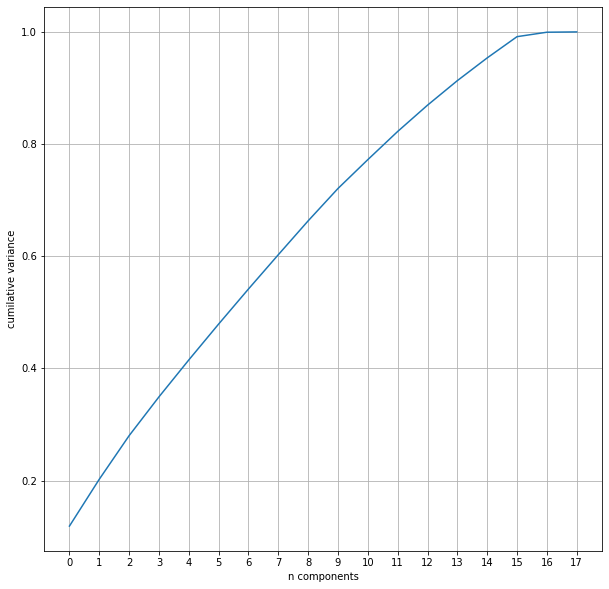

In [61]:

plt.xticks(np.arange(0,50,1))
plt.grid(True)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("n components")
plt.ylabel("cumilative variance")

In [62]:
no_of_features=16

In [63]:
def build_model(regression_fn,target,features,*hyperparameters):
    X=features
    Y=target
    
    _,X_new=apply_pca(X,*hyperparameters)
    
    x_train,x_test,y_train,y_test=train_test_split(X_new,Y,test_size=0.3)
    
    model = regression_fn(x_train,y_train)
    
    y_pred = model.predict(x_test)
    
    return {
        
        'x_initial':X,
        'x_transform':X_new,
        'x_train':x_train,
        'x_test':x_test,
        'y_train':y_train,
        'y_test':y_test,
        'y_pred':y_pred,
        'model':model
    }

In [64]:
def ols_reg(x_train,y_train):
    ols=sm.OLS(y_train,x_train)
    model=ols.fit()
    return model

In [65]:
def linear_reg(x_train,y_train):
    model=LinearRegression().fit(x_train,y_train)
    return model

In [66]:
def random_forest_reg(x_train,y_train):
    model=RandomForestRegressor(n_estimators=100, random_state=25)
    model.fit(x_train, y_train)
    return model

In [67]:
model_params={}

In [68]:
model_params['statsmodel_reg'] = build_model(ols_reg,y,
                                            X,no_of_features,True)

In [69]:
model         =model_params['statsmodel_reg']['model']
x_initial     =model_params['statsmodel_reg']['x_initial']
x_transform   =model_params['statsmodel_reg']['x_transform']
x_train       =model_params['statsmodel_reg']['x_train']
x_test        =model_params['statsmodel_reg']['x_test']
y_train       =model_params['statsmodel_reg']['y_train']
y_test        =model_params['statsmodel_reg']['y_test']
y_pred        =model_params['statsmodel_reg']['y_pred']


In [70]:
print('Rsquared: ',model.rsquared)
print('Adj Rsquared: ',model.rsquared_adj)
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred)) 
# print('Accuracy: ',model.score(x_test,y_test))

Rsquared:  0.2583431559154875
Adj Rsquared:  0.25561396789677737
Mean Absolute Error:  0.47734315205879707


In [71]:
model_params['sklearn_reg'] = build_model(linear_reg,y,
                                            X,no_of_features)

In [72]:
model         =model_params['sklearn_reg']['model']
x_initial     =model_params['sklearn_reg']['x_initial']
x_transform   =model_params['sklearn_reg']['x_transform']
x_train       =model_params['sklearn_reg']['x_train']
x_test        =model_params['sklearn_reg']['x_test']
y_train       =model_params['sklearn_reg']['y_train']
y_test        =model_params['sklearn_reg']['y_test']
y_pred        =model_params['sklearn_reg']['y_pred']

In [73]:
print('Training Score: ',model.score(x_train,y_train))
print('Adj Rsquared: ',r2_score(y_test,y_pred))
print('Accuracy: ',model.score(x_test,y_test))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred)) 

Training Score:  0.2758007006919597
Adj Rsquared:  0.2534734981903102
Accuracy:  0.2534734981903102
Mean Absolute Error:  0.48780599016382115


In [74]:
model_params['random_forest_reg'] = build_model(random_forest_reg,y,
                                            X,no_of_features)

In [75]:
model         =model_params['random_forest_reg']['model']
x_initial     =model_params['random_forest_reg']['x_initial']
x_transform   =model_params['random_forest_reg']['x_transform']
x_train       =model_params['random_forest_reg']['x_train']
x_test        =model_params['random_forest_reg']['x_test']
y_train       =model_params['random_forest_reg']['y_train']
y_test        =model_params['random_forest_reg']['y_test']
y_pred        =model_params['random_forest_reg']['y_pred']

In [76]:
print('Training Score: ',model.score(x_train,y_train))
print('Adj Rsquared: ',r2_score(y_test,y_pred))
print('Accuracy: ',model.score(x_test,y_test))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred)) 

Training Score:  0.9017436501016216
Adj Rsquared:  0.2690484125640378
Accuracy:  0.2690484125640378
Mean Absolute Error:  0.4851600386453846


<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Visualizing the Regression using Random Forest Regression algorithm')

Text(0.5, 0, 'Predicted Price')

Text(0, 0.5, 'Orig Price')

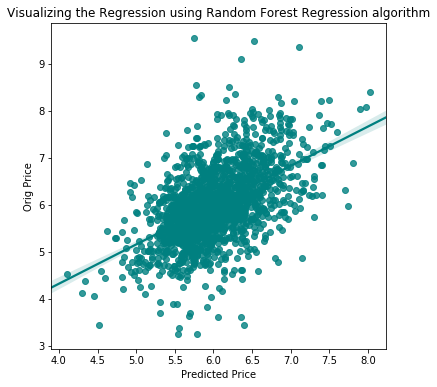

In [77]:
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using Random Forest Regression algorithm")
sns.regplot(y_pred, y_test, color = "teal")
plt.xlabel("Predicted Price")
plt.ylabel("Orig Price")
plt.show()

In [259]:
_,X_tr_new=apply_pca(X_tr,no_of_features)

In [260]:
y_final=model.predict(X_tr_new)

In [261]:
y_final = np.expm1(y_final)

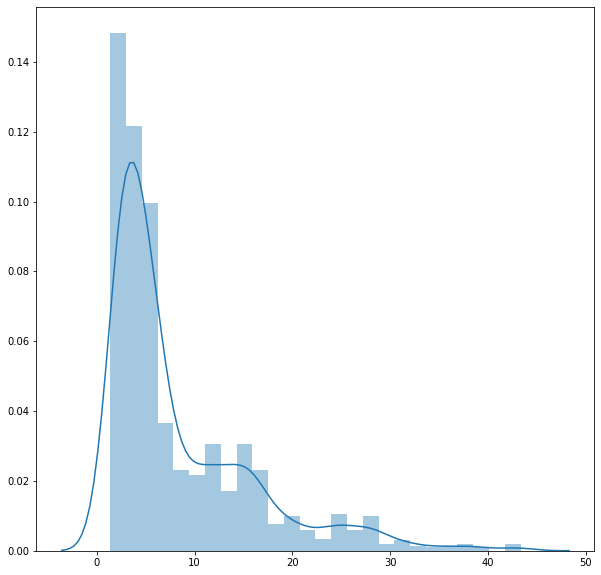

In [262]:
sns.distplot(y_final)

In [263]:
X_final = pd.concat([df_test_orig,pd.Series(y_final,name="Price")],axis=1)

In [264]:
y_final

array([ 4.41051688,  2.45976198, 12.7564562 , ...,  4.77172367,
        2.19822655, 13.60700769])

In [265]:
X_final.to_csv("Result.csv")

In [270]:
pd.DataFrame(y_final,columns=["Price"],index=None).to_csv("Fs.csv",index=False)
